QUIERO VALIDAR COMO SON LOS INGRESOS EN LOS ULTIMOS 5 ANOS EN SECTOR DE LAS TELECOMUNICACIONE SEN ARGNTINA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

1- Cargamos el data set a trabajar y especificamente la hoja "ingresos"

In [3]:
ruta = 'Internet.xlsx'
df_ingreso_int = pd.read_excel(ruta,sheet_name='Ingresos ')

2- Filtar solo los ultimos 5 anos

In [4]:
# Filtrar el dataset para obtener solo los datos desde el año 2020 en adelante
df_ingreso_int = df_ingreso_int[df_ingreso_int['Año'] >= 2020]

# Mostrar los primeros registros del dataset filtrado para confirmar
df_ingreso_int.head()


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [5]:
# dimensiones del dataset
df_ingreso_int.shape

(18, 4)

In [6]:
# ver los datos nulos y los tipo de datos en las columnas 
df_ingreso_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        18 non-null     int64  
 1   Trimestre                  18 non-null     int64  
 2   Ingresos (miles de pesos)  18 non-null     float64
 3   Periodo                    18 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 720.0+ bytes


No se observan datos nulos

In [7]:
# quiero ver un detalle de las columnas numericas
df_ingreso_int.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,18.000000,18.000000,1.800000e+01
mean,2022.333333,2.388889,1.030027e+08
std,2.970443,1.144752,1.141834e+08
min,2020.000000,1.000000,2.994622e+07
25%,2021.000000,1.250000,3.706720e+07
50%,2022.000000,2.000000,5.781941e+07
75%,2023.000000,3.000000,1.145790e+08
max,2033.000000,4.000000,4.420322e+08


en este punto decido eliminar la columna trimestre ya que estoy buscando una informacion general

In [8]:
df_ingreso_int = df_ingreso_int.drop('Trimestre',axis=1)
df_ingreso_int = df_ingreso_int.drop('Periodo',axis=1)

In [9]:
# Contar valores nulos en cada columna
nulos_por_columna = df_ingreso_int.isnull().sum()

# Contar valores faltantes en cada columna
faltantes_por_columna = df_ingreso_int.isna().sum()

print("Valores nulos por columna:\n", nulos_por_columna)
print("\nValores faltantes por columna:\n", faltantes_por_columna)


Valores nulos por columna:
 Año                          0
Ingresos (miles de pesos)    0
dtype: int64

Valores faltantes por columna:
 Año                          0
Ingresos (miles de pesos)    0
dtype: int64


no hay valores nulos ni faltantes

se valida si exiten filas repetidas 

In [10]:
print(f'el tamano antes de eliminar las filas {df_ingreso_int.shape}')
df_ingreso_int.drop_duplicates(inplace=True)
print(f'el tamano despues de eliminar las filas {df_ingreso_int.shape}')

el tamano antes de eliminar las filas (18, 2)
el tamano despues de eliminar las filas (18, 2)


no hay filas repetidas

outliers en columnas numericas de Ingresos por Internet

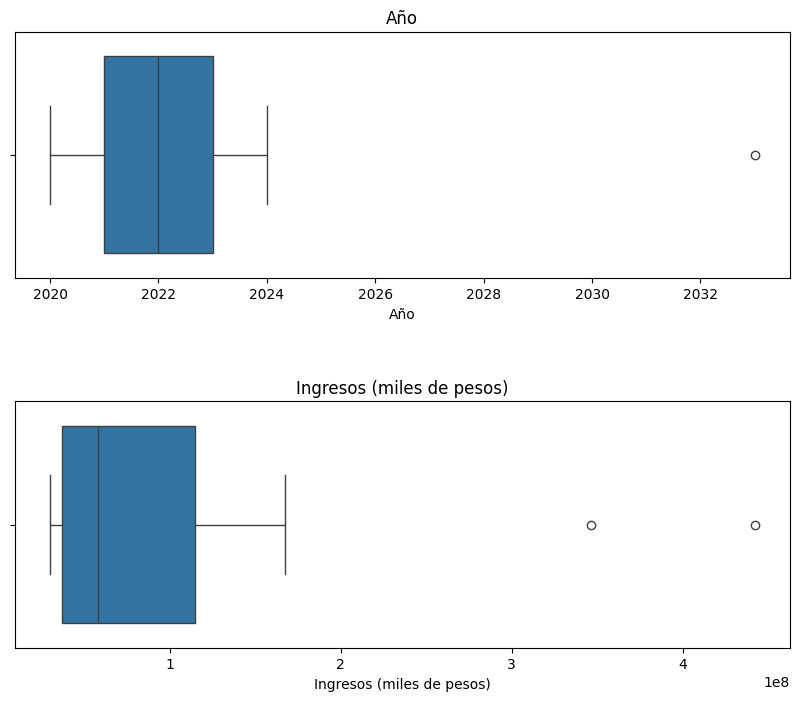

In [11]:
columnas_num = ['Año','Ingresos (miles de pesos)']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_num):
    sns.boxplot(x=col, data=df_ingreso_int, ax=ax[i])
    ax[i].set_title(col)

Reemplazar el valor de una fila específica en una columna:

aqui detectamos un outlier en Ano que sobrepasa el 2032, lo cual demuestraclaramente que es un error ya que nuestro dataset deberia tener entre 2020 y 2024, antes de hacer un cambio validemos si es 2023 o 2013, como borre la columna trimestre voy a crear un dataset temporal solo para este fin

In [12]:
ruta = 'Internet.xlsx'
df_ingreso_int_temp = pd.read_excel(ruta,sheet_name='Ingresos ')

ahora lo colocare como un formato Dataframe con pandas

In [13]:
df_ingreso_int_temp = pd.DataFrame(df_ingreso_int_temp)


Ahora selecciono solamente ano y trimestre para ver si si falta algun trimestre en 2023

In [14]:
df_ingreso_int_temp = df_ingreso_int_temp[['Año','Trimestre']].sort_values(by ='Año',ascending=False)

In [15]:
df_ingreso_int_temp.head(10)

,Año,Trimestre
5,2033,1
0,2024,2
1,2024,1
3,2023,3
4,2023,2
2,2023,4
6,2022,4
7,2022,3
8,2022,2
9,2022,1


efectivamente veo que falta el trimestre 1 de 2023, por tanto el dato 2033 tiene una digitacion erronea que corresponde a 2023

Procedo a reemplazar este 2033 por 2023

In [16]:
# Reemplazar el valor 2033 por 2023 en la columna 'Año'
df_ingreso_int['Año'] = df_ingreso_int['Año'].replace(2033, 2023)

# Verificar que el reemplazo se haya realizado correctamente
df_ingreso_int['Año'].value_counts()


Año
2023    4
2022    4
2021    4
2020    4
2024    2
Name: count, dtype: int64

En este punto quiero agrupar los datos por anos y simplicar el conteo

In [17]:
# Agrupar los datos por año y sumar los ingresos
ingresos_por_ano = df_ingreso_int.groupby('Año')['Ingresos (miles de pesos)'].sum()

print(ingresos_por_ano)


Año
2020    1.275858e+08
2021    1.633839e+08
2022    2.521691e+08
2023    5.226779e+08
2024    7.882312e+08
Name: Ingresos (miles de pesos), dtype: float64


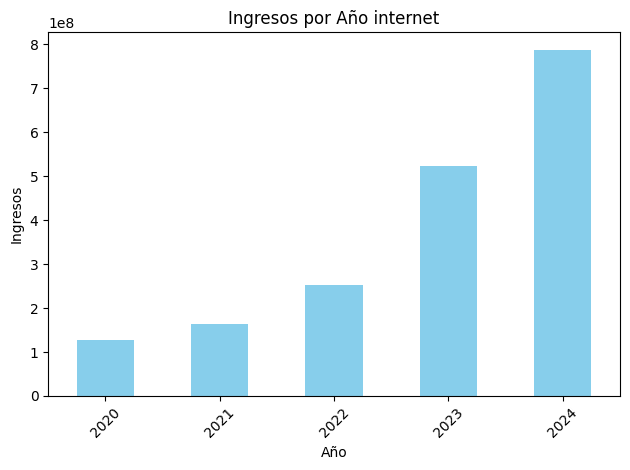

In [18]:
# Graficar los ingresos por año
ingresos_por_ano.plot(kind='bar', title='Ingresos por Año internet', xlabel='Año', ylabel='Ingresos', color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico claramente se puede demostrar el aumento de ingresos principalmente en 2023 y un alto crecimiento en lo que va de 2024

Guardo mi dataset de ingresos de Internet

In [19]:
df_ingreso_int.to_csv('df_ingreso_int.csv')

ahora pasamos al 2do dataset telefonia movil, aqui quiero extraer tambien la hoja de ingreso en los ultimos 5 anos

In [20]:
df_ing_cel = pd.read_excel('Telefonia_movil.xlsx',sheet_name= 'Ingresos' )
df_ing_cel.head(3)

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013


al igual que el caso de Internet quiero solo los ultimos 5 anos

In [21]:
# Filtrar el dataset para obtener solo los datos desde el año 2020 en adelante
df_ing_cel = df_ing_cel[df_ing_cel['Año'] >= 2020]

# Mostrar los primeros registros del dataset filtrado para confirmar
df_ing_cel.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
28,2020,1,72077147,Ene-Mar 2020
29,2020,2,73538944,Abr-Jun 2020
30,2020,3,79634755,Jul-Sept 2020
31,2020,4,83479114,Oct-Dic 2020
32,2021,1,93112153,Ene-Mar 2021


Dimensiones del dataset

In [22]:
df_ing_cel.shape

(18, 4)

Informacion del dataset

In [23]:
df_ing_cel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 28 to 45
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    18 non-null     int64 
 1   Trimestre              18 non-null     int64 
 2   Ingresos (miles de $)  18 non-null     int64 
 3   Periodo                18 non-null     object
dtypes: int64(3), object(1)
memory usage: 720.0+ bytes


Igualmente se aprecia que los datos estan completos

Descripcion de las filas numericas

In [24]:
df_ing_cel.describe()

,Año,Trimestre,Ingresos (miles de $)
count,18.000000,18.000000,1.800000e+01
mean,2021.777778,2.388889,2.650084e+08
std,1.352799,1.144752,2.787495e+08
min,2020.000000,1.000000,7.207715e+07
25%,2021.000000,1.250000,9.602962e+07
50%,2022.000000,2.000000,1.417435e+08
75%,2023.000000,3.000000,2.948924e+08
max,2024.000000,4.000000,1.108473e+09


no necesito las columnas Trimestre ni Periodo, asi que las elimino

In [25]:
df_ing_cel =df_ing_cel.drop('Trimestre',axis=1)
df_ing_cel=df_ing_cel.drop('Periodo',axis=1)

In [26]:
# Contar valores nulos en cada columna
nulos_por_columna = df_ing_cel.isnull().sum()

# Contar valores faltantes en cada columna
faltantes_por_columna = df_ing_cel.isna().sum()

print("Valores nulos por columna:\n", nulos_por_columna)
print("\nValores faltantes por columna:\n", faltantes_por_columna)


Valores nulos por columna:
 Año                      0
Ingresos (miles de $)    0
dtype: int64

Valores faltantes por columna:
 Año                      0
Ingresos (miles de $)    0
dtype: int64


No hay valores nulos

ahora filas repetidas

In [27]:
print(f'el tamano antes de eliminar las filas {df_ing_cel.shape}')
df_ing_cel.drop_duplicates(inplace=True)
print(f'el tamano despues de eliminar las filas {df_ing_cel.shape}')

el tamano antes de eliminar las filas (18, 2)
el tamano despues de eliminar las filas (18, 2)


no hay fils repetidas

Outliers para ingresos por telefonia

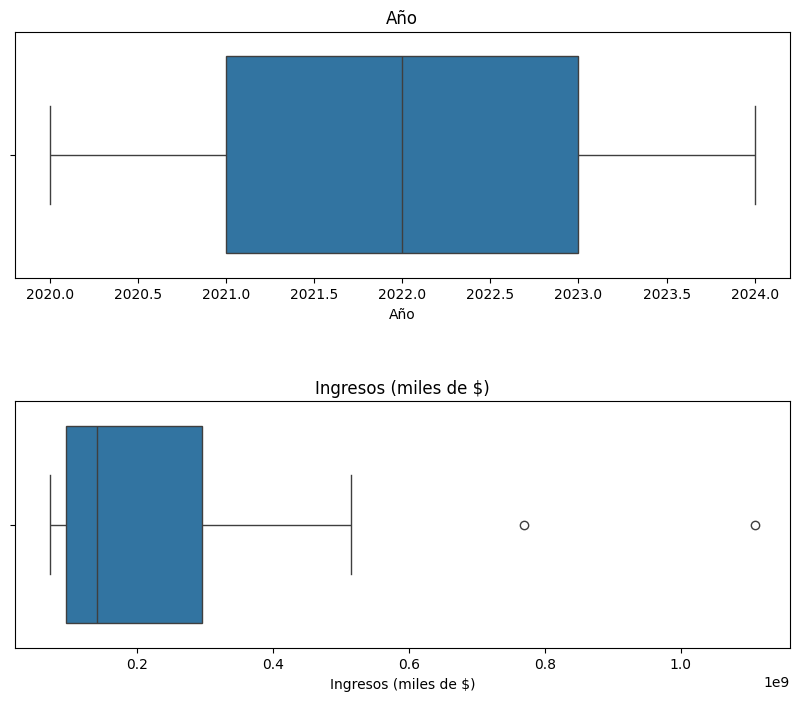

In [28]:
columnas_num = ['Año','Ingresos (miles de $)']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_num):
    sns.boxplot(x=col, data=df_ing_cel, ax=ax[i])
    ax[i].set_title(col)


aqui apreciamos que no hay datos anomalos en Anos, mientras que estos datos extremos en ingresos no quiere decir que haya anomalias

agrupar datos por ano e ingresos

In [29]:
# Agrupar los datos por año y sumar los ingresos
ingresos_por_ano_cel = df_ing_cel.groupby('Año')['Ingresos (miles de $)'].sum()

print(ingresos_por_ano_cel)


Año
2020     308729960
2021     443035884
2022     680077095
2023    1460351166
2024    1877957900
Name: Ingresos (miles de $), dtype: int64


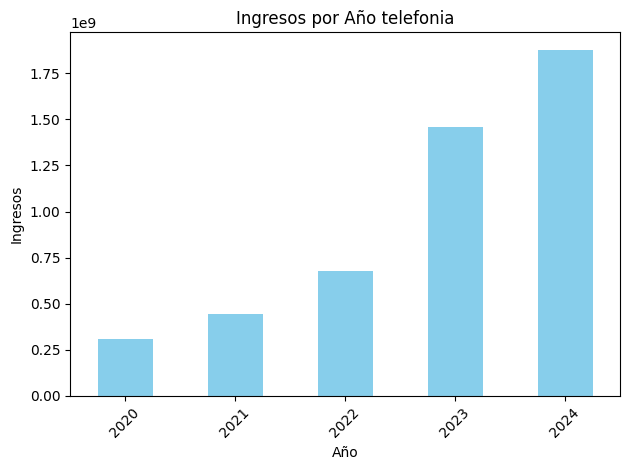

In [30]:
# Graficar los ingresos por año telefonia
ingresos_por_ano_cel.plot(kind='bar', title='Ingresos por Año telefonia', xlabel='Año', ylabel='Ingresos', color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa un alto crecimiento exponencial a partir de 2023 y con unas altas cifras de ingreso, y para lo que va de 2024 mantiene un buen ritmo

Pasamos al 3er dataset que es television

extraigo la hoja ingresos 

In [31]:
df_ingreso_tv = pd.read_excel('Television.xlsx',sheet_name='Ingresos_TV')

Filtrado de los ultimos 5 anos

In [32]:
# Filtrar el dataset para obtener solo los datos desde el año 2020 en adelante
df_ingreso_tv = df_ingreso_tv[df_ingreso_tv['Año'] >= 2020]

# Mostrar los primeros registros del dataset filtrado para confirmar
df_ingreso_tv.head(3)

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2024,2,2.662339e+08,1.248149e+08
1,2024,1,1.910639e+08,9.427053e+07
2,2023,4,1.335822e+08,6.474882e+07


dimensiones del datset

In [33]:
df_ingreso_tv.shape

(18, 4)

In [34]:
df_ingreso_tv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        18 non-null     int64  
 1   Trimestre                                  18 non-null     int64  
 2   Ingresos TV por suscripción  (miles de $)  18 non-null     float64
 3   Ingresos TV satelital (miles de $)         18 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 720.0 bytes


al igual que los otros datasets no se observan datos nulos

descripcion de columnas numericas

In [35]:
df_ingreso_tv.describe()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
count,18.000000,18.000000,1.800000e+01,1.800000e+01
mean,2021.777778,2.388889,7.229943e+07,3.517534e+07
std,1.352799,1.144752,6.559290e+07,3.089603e+07
min,2020.000000,1.000000,2.462001e+07,1.235276e+07
25%,2021.000000,1.250000,3.236214e+07,1.803814e+07
50%,2022.000000,2.000000,4.421775e+07,2.241379e+07
75%,2023.000000,3.000000,8.394636e+07,3.732654e+07
max,2024.000000,4.000000,2.662339e+08,1.248149e+08


elimino la columna Trimestre

In [36]:
df_ingreso_tv =df_ingreso_tv.drop('Trimestre',axis=1)


validar valores nulos o faltantes

In [37]:
# Contar valores nulos en cada columna
nulos_por_columna = df_ingreso_tv.isnull().sum()

# Contar valores faltantes en cada columna
faltantes_por_columna = df_ingreso_tv.isna().sum()

print("Valores nulos por columna:\n", nulos_por_columna)
print("\nValores faltantes por columna:\n", faltantes_por_columna)


Valores nulos por columna:
 Año                                          0
Ingresos TV por suscripción  (miles de $)    0
Ingresos TV satelital (miles de $)           0
dtype: int64

Valores faltantes por columna:
 Año                                          0
Ingresos TV por suscripción  (miles de $)    0
Ingresos TV satelital (miles de $)           0
dtype: int64


valores duplicados

In [38]:
print(f'el tamano antes de eliminar las filas {df_ingreso_tv.shape}')
df_ingreso_tv.drop_duplicates(inplace=True)
print(f'el tamano despues de eliminar las filas {df_ingreso_tv.shape}')

el tamano antes de eliminar las filas (18, 3)
el tamano despues de eliminar las filas (18, 3)


Ahora valido los outliers

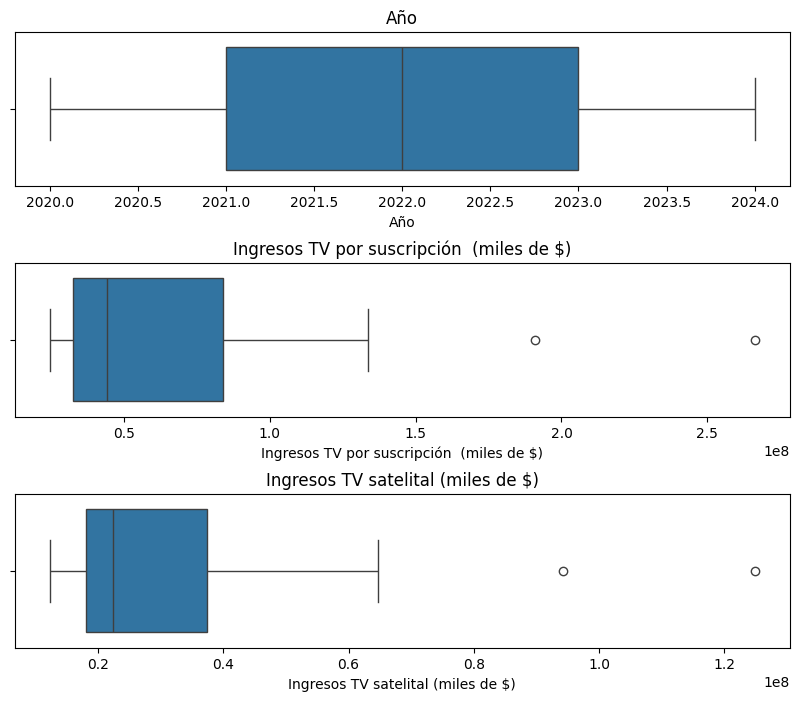

In [39]:
columnas_num = ['Año','Ingresos TV por suscripción  (miles de $)','Ingresos TV satelital (miles de $)']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_num):
    sns.boxplot(x=col, data=df_ingreso_tv, ax=ax[i])
    ax[i].set_title(col)

al igual que el outlier de telefonia no se observan anomalias

Aqui decido sumar los valores de TV por suscripcion y Tv saltelital, ya que busco una informacion en general 

In [40]:
df_ingreso_tv['ingresos_totales'] =df_ingreso_tv['Ingresos TV por suscripción  (miles de $)']+ df_ingreso_tv['Ingresos TV satelital (miles de $)']

solamente necesito ano e ingresos por tv

In [41]:
df_ingreso_tv = df_ingreso_tv[['Año','ingresos_totales']]

ahora agrupo ano y el total de ingresos

In [42]:
# Agrupar los datos por año y sumar los ingresos
ingresos_por_ano_tv = df_ingreso_tv.groupby('Año')['ingresos_totales'].sum()

print(ingresos_por_ano_tv)

Año
2020    1.537880e+08
2021    2.124253e+08
2022    3.048902e+08
2023    5.870591e+08
2024    6.763832e+08
Name: ingresos_totales, dtype: float64


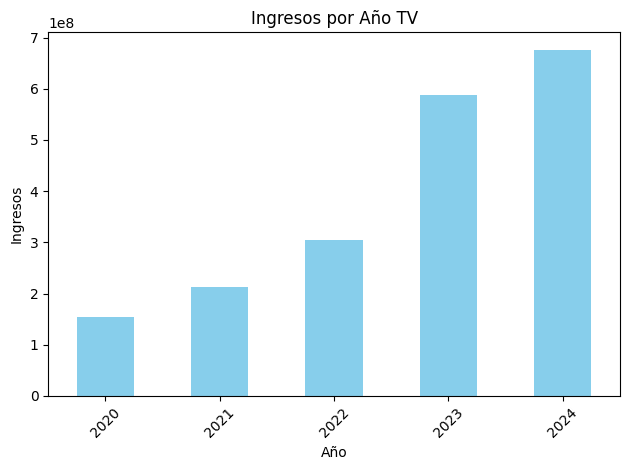

In [43]:
# Graficar los ingresos por año
ingresos_por_ano_tv.plot(kind='bar', title='Ingresos por Año TV', xlabel='Año', ylabel='Ingresos', color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede observar tambien un auge de los ingresos apartir de 2023 y que mantiene un crecimiento considerable para lo que va en 2024

In [44]:
# Combinar los datos en un solo DataFrame
ingresos_int_cel = pd.merge(ingresos_por_ano, ingresos_por_ano_cel, on="Año")


In [45]:
ingresos_combinados = pd.merge(ingresos_int_cel,ingresos_por_ano_tv,on='Año')
print(ingresos_combinados.head(3))

      Ingresos (miles de pesos)  Ingresos (miles de $)  ingresos_totales
Año                                                                     
2020               1.275858e+08              308729960      1.537880e+08
2021               1.633839e+08              443035884      2.124253e+08
2022               2.521691e+08              680077095      3.048902e+08


In [46]:
# Mover "Año" desde el índice a la fila superior como una columna
ingresos_combinados.reset_index(inplace=True, drop=False)

# Verificar el resultado
print(ingresos_combinados.head())

    Año  Ingresos (miles de pesos)  Ingresos (miles de $)  ingresos_totales
0  2020               1.275858e+08              308729960      1.537880e+08
1  2021               1.633839e+08              443035884      2.124253e+08
2  2022               2.521691e+08              680077095      3.048902e+08
3  2023               5.226779e+08             1460351166      5.870591e+08
4  2024               7.882312e+08             1877957900      6.763832e+08


In [47]:
# Renombrar las columnas
ingresos_combinados.rename(columns={
    "Ingresos (miles de pesos)": "Ingresos_Internet",
    "Ingresos (miles de $)": "Ingresos_telefonia",
    "ingresos_totales": "Ingresos_tv"
}, inplace=True)

# Confirmar los cambios
print(ingresos_combinados.head())

    Año  Ingresos_Internet  Ingresos_telefonia   Ingresos_tv
0  2020       1.275858e+08           308729960  1.537880e+08
1  2021       1.633839e+08           443035884  2.124253e+08
2  2022       2.521691e+08           680077095  3.048902e+08
3  2023       5.226779e+08          1460351166  5.870591e+08
4  2024       7.882312e+08          1877957900  6.763832e+08


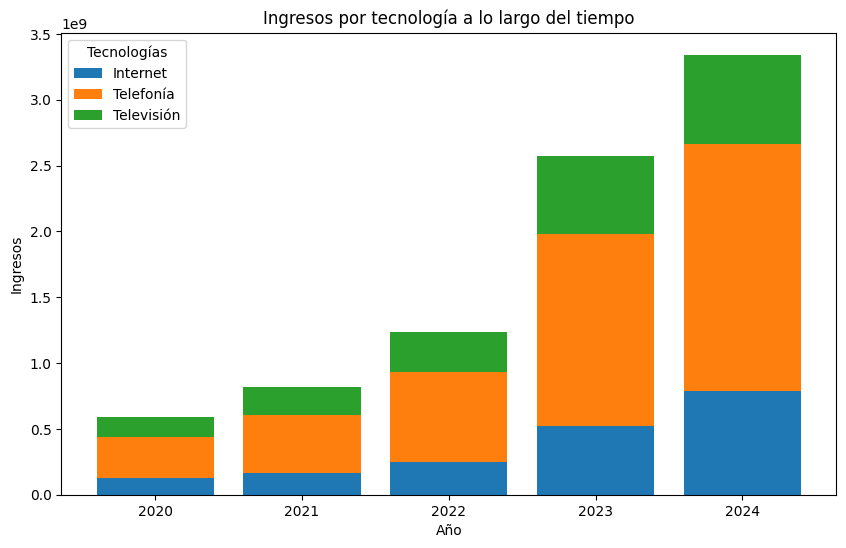

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras apiladas
ax.bar(ingresos_combinados['Año'], ingresos_combinados['Ingresos_Internet'], label='Internet')
ax.bar(ingresos_combinados['Año'], ingresos_combinados['Ingresos_telefonia'], 
       bottom=ingresos_combinados['Ingresos_Internet'], label='Telefonía')
ax.bar(ingresos_combinados['Año'], ingresos_combinados['Ingresos_tv'], 
       bottom=ingresos_combinados['Ingresos_Internet'] + ingresos_combinados['Ingresos_telefonia'], label='Televisión')

# Etiquetas y título
ax.set_title('Ingresos por tecnología a lo largo del tiempo')
ax.set_xlabel('Año')
ax.set_ylabel('Ingresos')
ax.legend(title='Tecnologías')

plt.show()



En este grafico podemos observar que la tecnologias que genera ingresos considerablemente es la telefonia, seguido por el Internet y por ultimo la television

CONCLUSIONES

Segun los datos observados se aprecia que la tecnologia de telecomunicaciones  
- El negocio de Internet es la segunda tecnologia que presenta mayor ingreso solo superado por telefonia

- las telecomunicaciones en general siempre han presentado incremento a lo largo de los anos, el salto se da en 2023, y con solo 2 trimestres de 2024 se obseva una tendencia a seguir creciendo de manera exponencial 

OTROS ANALISIS

En este punto quiero ver como son los accesos de tecnologias y las velocidades por provincias y determinar si existen posibles nichos de negocio

In [49]:

# Cargar las hojas de cálculo

totales_vmd_df = pd.read_excel(ruta, sheet_name='Totales VMD')
velocidad_por_prov_df = pd.read_excel(ruta, sheet_name='Velocidad % por prov')
totales_accesos_df = pd.read_excel(ruta, sheet_name='Totales Accesos por rango')
accesos_tec_df = pd.read_excel(ruta, sheet_name='Accesos Por Tecnología')

In [50]:
# Mostrar un resumen de los datos
print("Resumen de Totales VMD:")
print(totales_vmd_df.describe())
print("\nResumen de Velocidad % por prov:")
print(velocidad_por_prov_df.describe())
print("\nResumen de Totales Accesos por rango:")
print(totales_accesos_df.describe())
print("\nResumen de Totales Accesos por tecnologia:")
print(accesos_tec_df.describe())

Resumen de Totales VMD:
               Año  Trimestre  Mbps (Media de bajada)
count    42.000000  42.000000               42.000000
mean   2018.761905   2.452381               39.334762
std       3.074756   1.130560               43.643195
min    2014.000000   1.000000                3.617127
25%    2016.000000   1.250000                6.038428
50%    2019.000000   2.000000               18.855000
75%    2021.000000   3.000000               51.370000
max    2024.000000   4.000000              139.250000

Resumen de Velocidad % por prov:
               Año    Trimestre  Mbps (Media de bajada)
count  1008.000000  1008.000000             1008.000000
mean   2018.761905     2.452381               24.720245
std       3.039439     1.117574               33.660764
min    2014.000000     1.000000                2.573729
25%    2016.000000     1.000000                4.866698
50%    2019.000000     2.000000               10.089315
75%    2021.000000     3.000000               29.875292
max    2

In [51]:
# Verificar datos faltantes
print("\nDatos faltantes en Totales VMD:")
print(totales_vmd_df.isnull().sum())
print("\nDatos faltantes en Velocidad % por prov:")
print(velocidad_por_prov_df.isnull().sum())
print("\nDatos faltantes en Totales Accesos por rango:")
print(totales_accesos_df.isnull().sum())
print("\nDatos faltantes en Accesos por tecnologia:")
print(accesos_tec_df.isnull().sum())


Datos faltantes en Totales VMD:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Datos faltantes en Velocidad % por prov:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Datos faltantes en Totales Accesos por rango:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

Datos faltantes en Accesos por tecnologia:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


Aqui puedo ver que accesos por tecnologia tiene valores faltantes

In [52]:
print(accesos_tec_df.shape)
print(accesos_tec_df.isnull().sum().count())

(1009, 9)
9


veo que es un dataset de 1009 filas con 9 valores faltantes, lo que representa menos del 5% , en este punto no quiero peder datos importantes asi que cada columna tendra una consireracion unica a tomar

In [53]:
accesos_tec_df.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [54]:
# Ver las filas con valores faltantes
filas_con_faltantes = accesos_tec_df[accesos_tec_df.isnull().any(axis=1)]
print("Filas con valores faltantes:")
print(filas_con_faltantes)


Filas con valores faltantes:
      Año                                          Trimestre Provincia  ADSL  \
1007  NaN                                                NaN       NaN   NaN   
1008    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

      Cablemodem  Fibra óptica  Wireless  Otros  Total  
1007         NaN           NaN       NaN    NaN    NaN  
1008         NaN           NaN       NaN    NaN    NaN  


In [55]:
print(accesos_tec_df.iloc[1007])
print(accesos_tec_df.iloc[1008])

Año             NaN
Trimestre       NaN
Provincia       NaN
ADSL            NaN
Cablemodem      NaN
Fibra óptica    NaN
Wireless        NaN
Otros           NaN
Total           NaN
Name: 1007, dtype: object
Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                     NaN
ADSL                                                          NaN
Cablemodem                                                    NaN
Fibra óptica                                                  NaN
Wireless                                                      NaN
Otros                                                         NaN
Total                                                         NaN
Name: 1008, dtype: object


Para irme por lo seguro elimino completamente las filas 1007 y 1008 solamente

In [56]:
accesos_tec_df.drop(index=accesos_tec_df.index[[1007,1008]], inplace=True)


valido nuevamente

In [57]:
print("\nDatos faltantes en Accesos por tecnologia:")
print(accesos_tec_df.isnull().sum())


Datos faltantes en Accesos por tecnologia:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


se puede apreciar que el dataset accesos por tecnologias tiene sus columnas limpias de faltantes o nulos

TRATAMIENTO DE VALORES DUPLICADOS

In [58]:
print("\nDuplicados en Totales VMD:", totales_vmd_df.duplicated().sum())
print("\nDuplicados en velocidad x prov:", velocidad_por_prov_df.duplicated().sum())
print("\nDuplicados en totales acceso:", totales_accesos_df.duplicated().sum())
print("\nDuplicados en accesos por tecnologia:", accesos_tec_df.duplicated().sum())


Duplicados en Totales VMD: 0

Duplicados en velocidad x prov: 0

Duplicados en totales acceso: 0

Duplicados en accesos por tecnologia: 0


no tenemos valores duplicados en nuestros datasets a trabajar

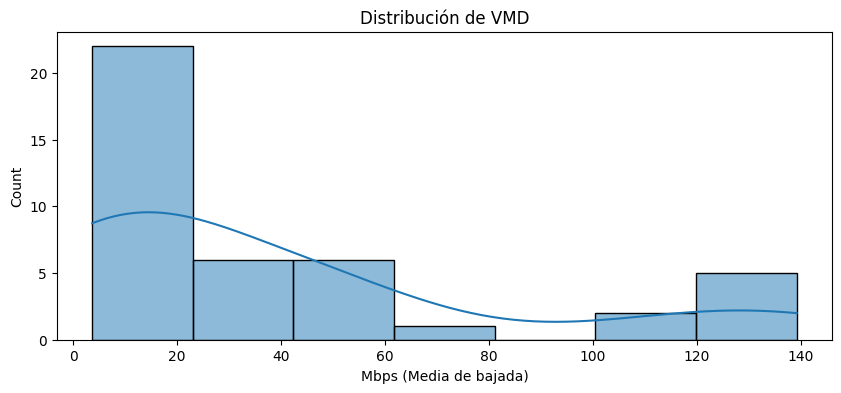

In [59]:
# Gráfico de distribución y outliers de Totales VMD
plt.figure(figsize=(10, 4))
sns.histplot(totales_vmd_df['Mbps (Media de bajada)'], kde=True)
plt.title('Distribución de VMD')
plt.show()


Puedo validar en la distribucion de descargas en cuanto a velocidad que la mayor parte se sentra entre 1 y 20Mbps, esto me da muestra de una amplia tendencia de las necesidades de la poblacion 

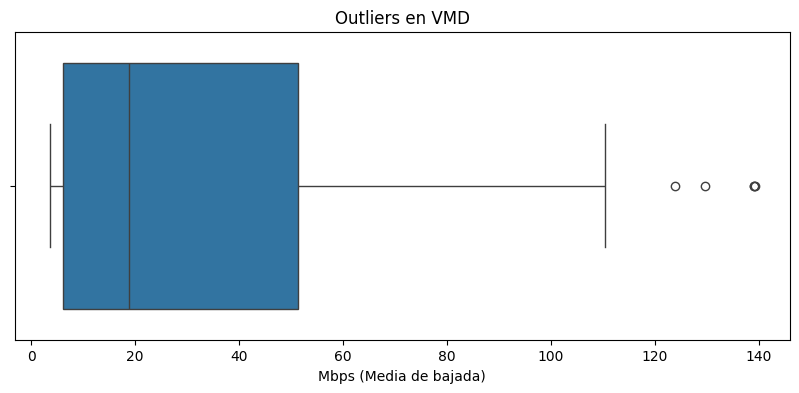

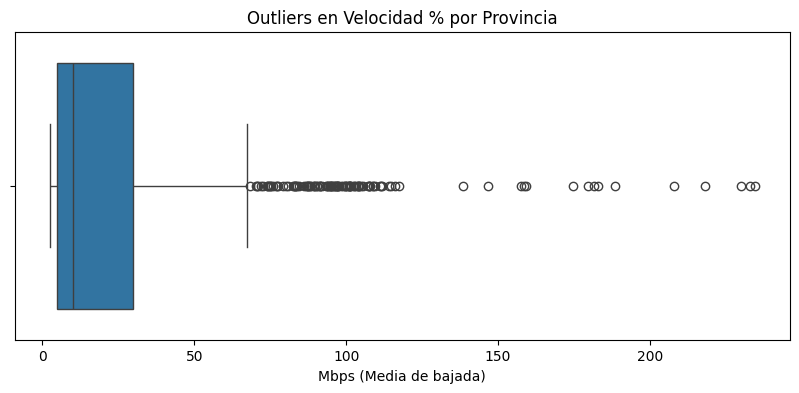

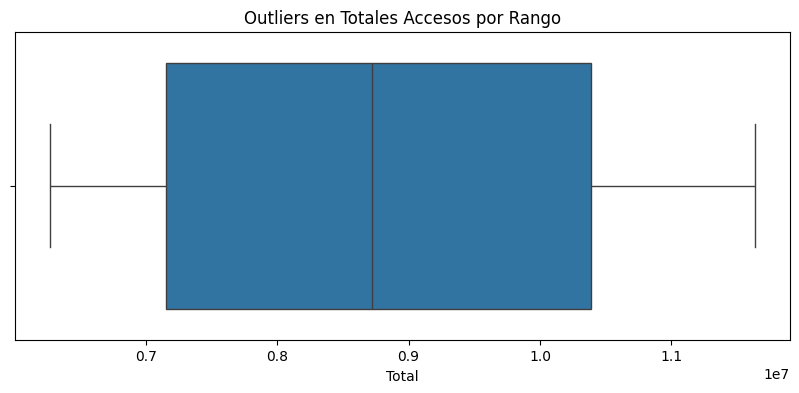

In [60]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=totales_vmd_df['Mbps (Media de bajada)'])
plt.title('Outliers en VMD')
plt.show()


plt.figure(figsize=(10, 4))
sns.boxplot(x=velocidad_por_prov_df['Mbps (Media de bajada)'])
plt.title('Outliers en Velocidad % por Provincia')
plt.show()


plt.figure(figsize=(10, 4))
sns.boxplot(x=totales_accesos_df['Total'])
plt.title('Outliers en Totales Accesos por Rango')
plt.show()





In [61]:
totales_vmd_df.head()


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


AHORA PASO A LA SIGUIENTE ETAPA PARA VALIDAR CUALES SON LOS TIPOS DE PLANES DE INTERNET MAS UTILIZADOS, PARA ELLO TRABAJARE EN EL DATASET TOTALES ACCESO

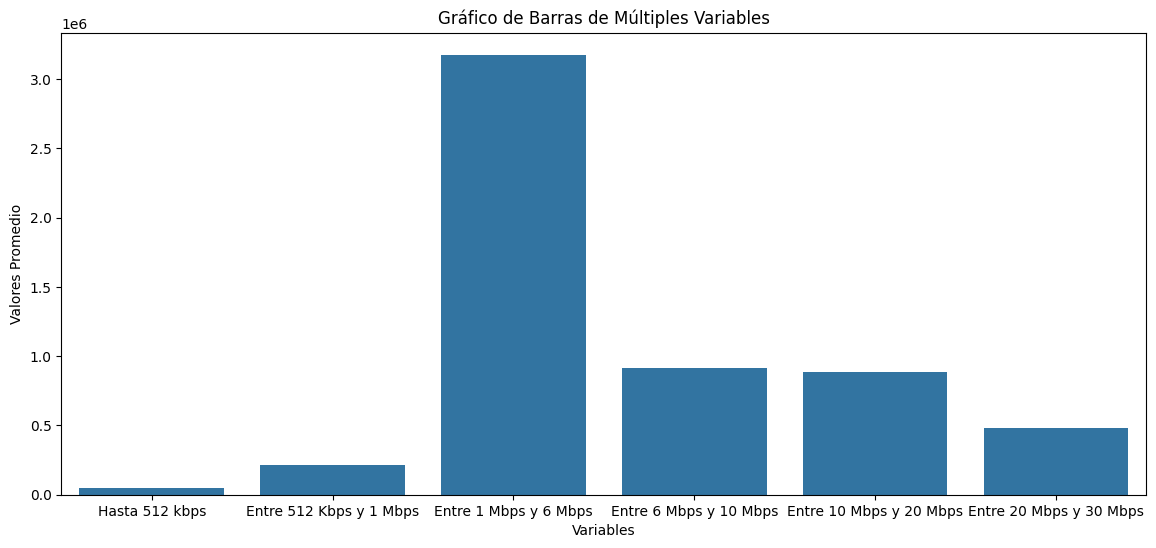

In [62]:
# Selecciona las columnas que quieres visualizar
columns_vel = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps','Entre 6 Mbps y 10 Mbps','Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps']
data = totales_accesos_df[columns_vel]

# Transforma el DataFrame a formato largo
data_melted_vel = data.melt(var_name='Variable', value_name='Valores')

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Genera el gráfico de barras
sns.barplot(x='Variable', y='Valores', data=data_melted_vel, errorbar=None)

# Personaliza el gráfico
plt.title('Gráfico de Barras de Múltiples Variables')
plt.xlabel('Variables')
plt.ylabel('Valores Promedio')
plt.show()


Aqui valido que los planes de internet mas adquiridos estan entre 1 y 6 Mbps, mientras tambien sea aprecia bajos promedios entre planes que estan desde 512 Kbps a 1 Mbps, por otro lado se aprecia tambien bajo planes que van desde los 6 hasta los 30 Mbps esto nos una idea de inversion, llevar el mayor porcentaje de la cantidad de clientes que estan entre 1 y 6a los planes superiores ofreciendoles membresias premiun, pero en general se observa un amplio mercado para atacar, por otro lado es muy baja la poblacion que esta entre 512kbps y 1 Mbps.

Esto me lleva al siguiente paso, trabajar el dataset velocidad por provincias, y validar cuales son las ciudades que presentan mas uso de internet en velocidades que van desde 1 a 6 Mbps

In [63]:
# Filtra el DataFrame para mostrar solo las ciudades con valores promedio entre 1 y 6 Mbps
velocidad_filtrada = velocidad_por_prov_df[
    (velocidad_por_prov_df['Mbps (Media de bajada)'] >= 1) & 
    (velocidad_por_prov_df['Mbps (Media de bajada)'] <= 6) 
]

In [64]:
niveles_frecuencia = velocidad_filtrada['Provincia'].value_counts()
print(niveles_frecuencia)

Provincia
Santa Cruz             23
La Pampa               23
Mendoza                21
San Juan               21
Chubut                 19
Tierra Del Fuego       19
La Rioja               18
San Luis               18
Santiago Del Estero    17
Catamarca              15
Jujuy                  15
Río Negro              15
Salta                  14
Entre Ríos             13
Formosa                13
Tucumán                13
Neuquén                12
Buenos Aires           11
Corrientes             11
Santa Fe               11
Córdoba                10
Chaco                   9
Capital Federal         8
Misiones                8
Name: count, dtype: int64


In [65]:
# Agrupa por 'Provincia' y calcula la suma total de 'Mbps (Media de bajada)' para cada provincia
velocidad_suma = velocidad_filtrada.groupby('Provincia')['Mbps (Media de bajada)'].sum().reset_index()

niveles_frecuencia = velocidad_suma['Provincia'].value_counts()
print(niveles_frecuencia)



Provincia
Buenos Aires           1
Capital Federal        1
Tierra Del Fuego       1
Santiago Del Estero    1
Santa Fe               1
Santa Cruz             1
San Luis               1
San Juan               1
Salta                  1
Río Negro              1
Neuquén                1
Misiones               1
Mendoza                1
La Rioja               1
La Pampa               1
Jujuy                  1
Formosa                1
Entre Ríos             1
Córdoba                1
Corrientes             1
Chubut                 1
Chaco                  1
Catamarca              1
Tucumán                1
Name: count, dtype: int64


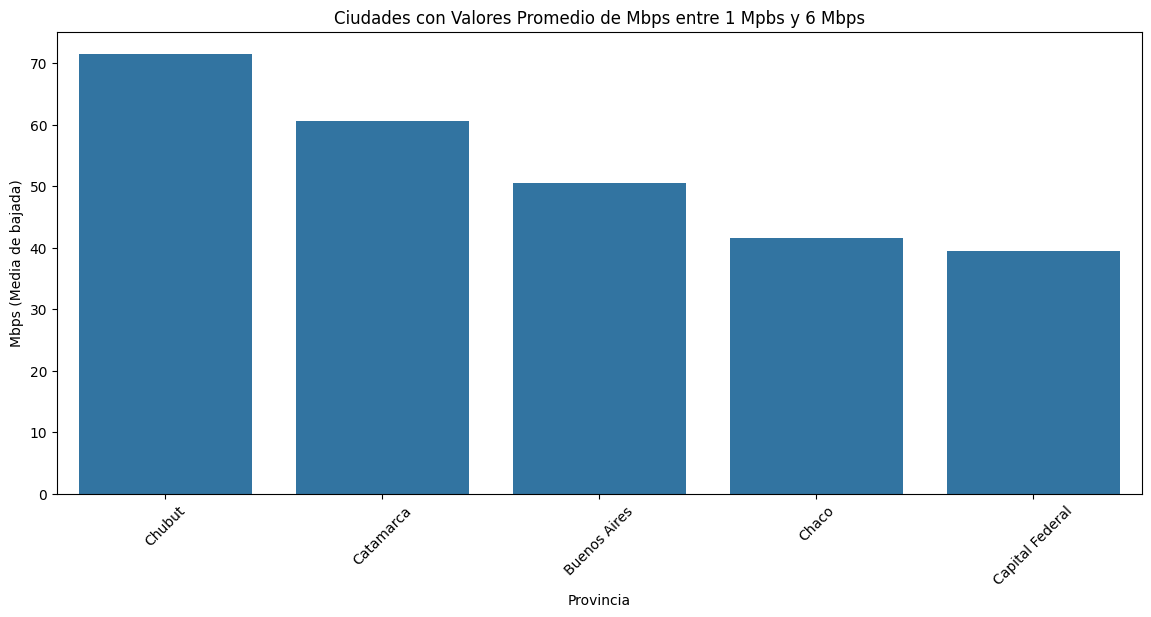

In [66]:
# Configura el tamaño del gráfico
plt.figure(figsize=(14, 6))
#velocidad_filtrada_top5 = velocidad_filtrada.head(5)

# Genera el gráfico de barras con el DataFrame filtrado
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_suma.head(5).sort_values(by=('Mbps (Media de bajada)'),ascending=False), errorbar=None)

# Personaliza el gráfico
plt.title('Ciudades con Valores Promedio de Mbps entre 1 Mpbs y 6 Mbps')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)  # Rota los nombres de las provincias para mejor visualización
plt.show()

    tal como se puede ver estas velocidades estan presente en gran parte de las provincias de Argentina, con mayoria en Chubut, Catamarca y Buenos Aires

SEGUN LO OBSERVADO EN ESTE PROCESO PUEDO RECOMENDAR:

- ENFOCAR LOS ESFUERZOS Y FUERZA DE CAMPANA EN OFRECER A LOS CLIENTES QUE SE ENCUENTRAN EN VELOCIDADES DE 1 A 6 MPBS, LOS PLANES QUE ABARCAN DE 6 MPBS EN ADELANTE MIGRANDOLOS CON MEMBRESIAS PREMIUN Y CIERTOS BENEFICIOS, EL MERCADO DE HOGARES CON PLANES DE 1 A 6 MBP ESALTO, MIENTRAS QUE MUY BAJA CANTIDAD DE HOGARES ESTAN EN PLANES SUPERIORES, HAY QUE TOMAR EN CUENTA QUE LOS CONTENIDOS EN LA WEB CON EL PASAR DE LOS TIEMPOS SE VUELVEN MAS PESADOS Y POR ENDE SE NECESITAN MEJORES VELOCIDADES DE CONEXION, POR LO QUE SE DEBE CUANTO ANTES BUCAR ESTAS MIGRACIONES Y AUMENTAR LOS INGRESOS.

- LAS PROVINCIAS DONDE HAY MAYOR POSIBILIDAD DE CONCRETAR ESTAS MIGRACIONES SON EN CHUBUT, CATAMARCA, BUENOS AIRES, CHACO Y CAPITAL FEDERAL
